In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,GridSearchCV,train_test_split
import warnings
warnings.simplefilter(action='ignore')
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
d1=pd.read_csv('DS2_C6_S2_WorldCities_Data_Practice.csv')
d2=pd.read_csv('DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv')
d3=pd.read_csv('DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv')
d4=pd.read_csv('DS2_C6_S2_Cities_Data_Practice.csv')

In [3]:
d1=d1.rename(columns={'city':'City'})

In [4]:
d1.sort_values(by='population',ascending=False)

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
9469,Wé,We,-20.9000,167.2667,New Caledonia,NC,NCL,Province Îles,admin,NaN,1540672599
9470,Preševo,Presevo,42.3067,21.6500,Serbia,RS,SRB,Preševo,admin,NaN,1688970219
9471,Bujanovac,Bujanovac,42.4667,21.7667,Serbia,RS,SRB,Bujanovac,admin,NaN,1688743477
9472,Kitamilo,Kitamilo,0.2222,33.2061,Uganda,UG,UGA,Buvuma,admin,NaN,1800610172


In [5]:
d1.drop_duplicates(subset='City',keep='first')

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


In [6]:
df=d1.merge(d2, on='City',how='inner')
df=df.merge(d3, on='City',how='inner')
df=df.merge(d4, on='City',how='inner')

In [7]:
df.drop_duplicates(subset='City',keep='first')

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,...,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,...,30.54,69.29,13.91,2.30,11.80,8.52,0.98,1967.31,2065.67,Japan
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,...,57.91,15.66,48.27,1.88,3.37,16.83,0.45,807.70,336.54,Indonesia
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,...,73.03,42.45,52.56,0.84,2.41,7.24,0.84,362.03,362.03,India
4,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,...,70.49,26.43,34.63,0.84,3.02,6.03,0.89,603.39,337.90,India
5,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,...,65.22,13.14,66.36,1.58,2.77,4.75,0.86,791.68,221.67,Philippines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Chiang Mai,Chiang Mai,18.7889,98.9833,Thailand,TH,THA,Chiang Mai,admin,132634.0,...,30.55,37.50,37.78,1.05,3.53,11.40,0.82,426.24,227.95,Thailand
359,Brighton,Brighton,50.8429,-0.1313,United Kingdom,GB,GBR,Brighton and Hove,NaN,134293.0,...,50.25,62.62,33.12,2.49,14.95,4.97,1.37,1295.38,1594.31,United Kingdom
364,Stavanger,Stavanger,58.9701,5.7333,Norway,NO,NOR,Rogaland,admin,129300.0,...,29.13,76.50,20.83,4.48,10.65,13.44,1.68,2240.74,2957.77,Norway
365,Cambridge,Cambridge,43.3972,-80.3114,Canada,CA,CAN,Ontario,NaN,129920.0,...,57.18,70.61,24.22,1.99,8.22,7.97,1.39,1345.20,2730.26,United States


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 386
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   387 non-null    object 
 1   city_ascii             387 non-null    object 
 2   lat                    387 non-null    float64
 3   lng                    387 non-null    float64
 4   country                387 non-null    object 
 5   iso2                   387 non-null    object 
 6   iso3                   387 non-null    object 
 7   admin_name             386 non-null    object 
 8   capital                156 non-null    object 
 9   population             386 non-null    float64
 10  id                     387 non-null    int64  
 11  Movehub Rating         387 non-null    float64
 12  Purchase Power         387 non-null    float64
 13  Health Care            387 non-null    float64
 14  Pollution              387 non-null    float64
 15  Qualit

In [9]:
num=list(df.select_dtypes(include=['float64','int64']).columns)
num

['lat',
 'lng',
 'population',
 'id',
 'Movehub Rating',
 'Purchase Power',
 'Health Care',
 'Pollution',
 'Quality of Life',
 'Crime Rating',
 'Cappuccino',
 'Cinema',
 'Wine',
 'Gasoline',
 'Avg Rent',
 'Avg Disposable Income']

In [10]:
df=df.dropna()
df

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,...,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,...,30.54,69.29,13.91,2.30,11.80,8.52,0.98,1967.31,2065.67,Japan
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,...,57.91,15.66,48.27,1.88,3.37,16.83,0.45,807.70,336.54,Indonesia
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,...,73.03,42.45,52.56,0.84,2.41,7.24,0.84,362.03,362.03,India
4,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,...,70.49,26.43,34.63,0.84,3.02,6.03,0.89,603.39,337.90,India
5,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,...,65.22,13.14,66.36,1.58,2.77,4.75,0.86,791.68,221.67,Philippines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Braga,Braga,41.5333,-8.4167,Portugal,PT,PRT,Braga,admin,181494.0,...,14.54,69.91,18.12,1.02,4.48,2.13,1.39,383.62,596.74,Portugal
356,Lausanne,Lausanne,46.5333,6.6333,Switzerland,CH,CHE,Vaud,admin,138905.0,...,87.62,73.21,35.55,3.15,12.59,8.40,1.32,1714.00,4266.11,Switzerland
357,Darwin,Darwin,-12.4381,130.8411,Australia,AU,AUS,Northern Territory,admin,136828.0,...,6.78,78.52,32.80,3.36,10.08,10.08,1.04,2015.94,2435.93,Australia
358,Chiang Mai,Chiang Mai,18.7889,98.9833,Thailand,TH,THA,Chiang Mai,admin,132634.0,...,30.55,37.50,37.78,1.05,3.53,11.40,0.82,426.24,227.95,Thailand


In [11]:
df2=df.copy()
df=df[['City','population','Movehub Rating','Purchase Power','Health Care','Pollution','Quality of Life','Crime Rating','Cappuccino','Cinema', 'Wine','Gasoline','Avg Rent','Avg Disposable Income']]

In [12]:
df2=df2.dropna()
df

,City,population,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Tokyo,37977000.0,80.00,47.57,71.53,30.54,69.29,13.91,2.30,11.80,8.52,0.98,1967.31,2065.67
1,Jakarta,34540000.0,69.15,17.38,38.33,57.91,15.66,48.27,1.88,3.37,16.83,0.45,807.70,336.54
2,Delhi,29617000.0,77.12,34.39,74.99,73.03,42.45,52.56,0.84,2.41,7.24,0.84,362.03,362.03
4,Mumbai,23355000.0,77.13,28.83,58.41,70.49,26.43,34.63,0.84,3.02,6.03,0.89,603.39,337.90
5,Manila,23088000.0,68.31,14.80,80.56,65.22,13.14,66.36,1.58,2.77,4.75,0.86,791.68,221.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Braga,181494.0,75.07,30.21,69.71,14.54,69.91,18.12,1.02,4.48,2.13,1.39,383.62,596.74
356,Lausanne,138905.0,87.21,90.77,65.85,87.62,73.21,35.55,3.15,12.59,8.40,1.32,1714.00,4266.11
357,Darwin,136828.0,79.63,49.51,75.28,6.78,78.52,32.80,3.36,10.08,10.08,1.04,2015.94,2435.93
358,Chiang Mai,132634.0,68.64,15.89,85.91,30.55,37.50,37.78,1.05,3.53,11.40,0.82,426.24,227.95


In [13]:
df.iloc[:,1:]=StandardScaler().fit_transform(df.iloc[:,1:])

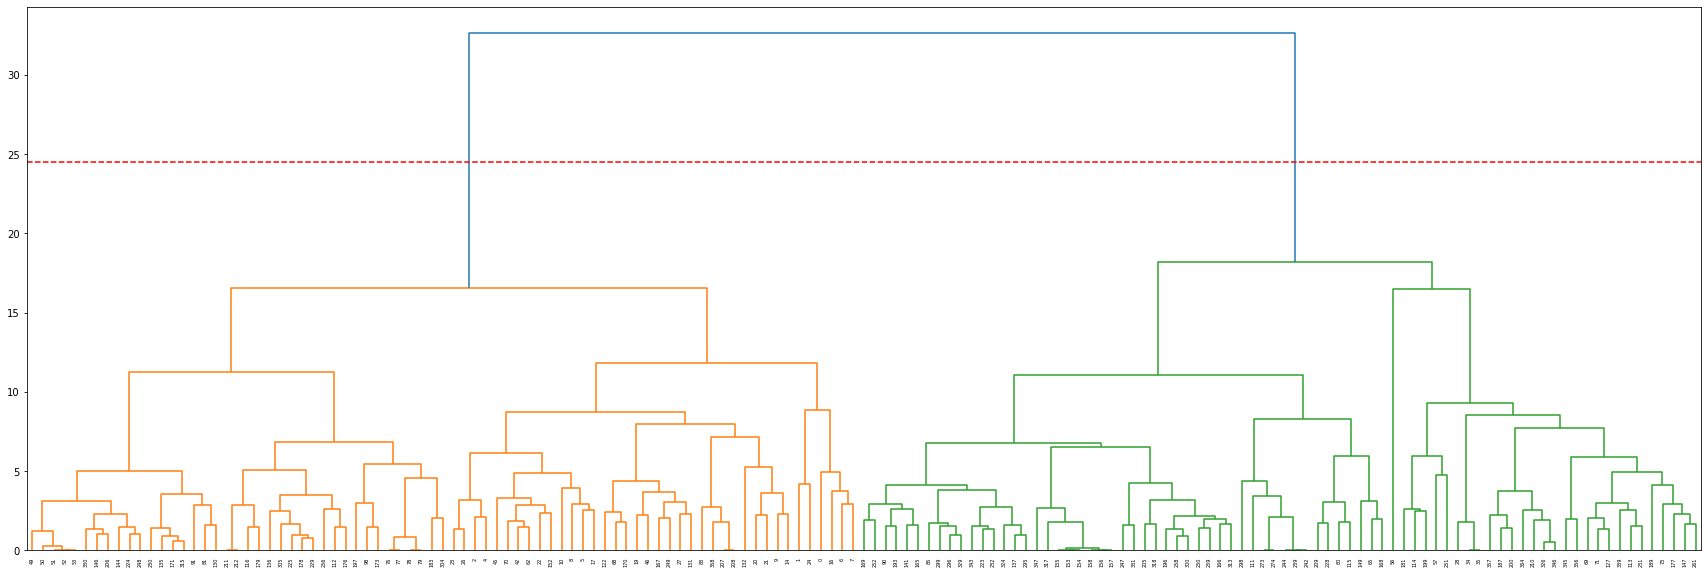

In [14]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df.iloc[:,1:], method = 'ward'),labels=df.index)
plt.axhline(y=24.5, color='r', linestyle='--')

In [48]:
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(df.iloc[:,1:])
len(y_hc1)

155

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


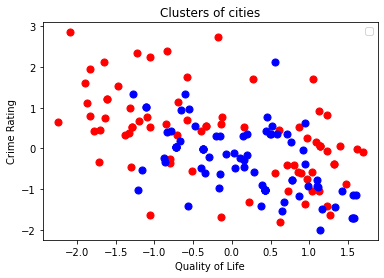

In [57]:
plt.scatter(df['Quality of Life'][y_hc1 == 0], df['Crime Rating'][y_hc1 == 0], s = 50, c = 'red')
plt.scatter(df['Quality of Life'][y_hc1 == 1], df['Crime Rating'][y_hc1 == 1], s = 50, c = 'blue')
plt.title('Clusters of cities')
plt.xlabel('Quality of Life')
plt.ylabel('Crime Rating')
plt.legend()
plt.show()

In [ ]:
df['HC']=y_hc1
df2['HC']=y_hc1

In [ ]:
df

In [ ]:
X=df.drop(['City','HC'],axis=1)
y=df['HC']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=88)

In [50]:
logmodel=LogisticRegression()

In [51]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred=logmodel.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.7741935483870968

In [54]:
pd.DataFrame(logmodel.coef_,columns=X.columns)

,population,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,1.367127,-0.271068,-0.151386,-0.046726,0.213772,-0.213369,-0.380254,-0.040356,-0.238229,1.336926,-0.323544,0.100045,-0.050816
1,0.024749,0.187973,0.320569,0.636865,-0.973531,0.434730,0.258997,1.382793,0.337810,0.073020,0.471409,1.296360,0.862765
2,0.304091,-0.439076,-0.819689,-0.446338,-0.166471,-1.217696,0.698347,-0.279751,-0.179557,-0.134879,-1.148222,-0.180679,-0.661235
3,-0.428238,-0.057702,0.405717,-0.088863,1.140205,0.650276,1.030972,0.293983,0.015292,-0.020493,-0.453595,-0.756387,0.605125
4,0.029352,0.023714,0.056180,-0.049075,-0.089529,0.019029,-0.030158,-0.028886,0.629016,0.153018,-0.149866,-0.042641,0.000874
5,-0.367265,0.176559,-0.157847,-1.022002,-0.773594,-0.346483,0.291251,-0.613188,0.145207,-0.574275,1.128790,0.260161,-0.354765
6,-0.385768,-0.882809,-0.656887,-0.081417,1.490009,-0.016419,-0.750706,-0.663530,-0.400918,-0.952118,0.263689,-0.427048,-0.827135
7,-0.428107,0.582841,0.643966,1.151812,-0.886506,0.480941,-0.558073,-0.263445,-0.108218,-0.599185,0.993730,-0.702823,0.182116
8,-0.115941,0.679567,0.359378,-0.054257,0.045645,0.208991,-0.560375,0.212379,-0.200403,0.717986,-0.782392,0.453011,0.243070


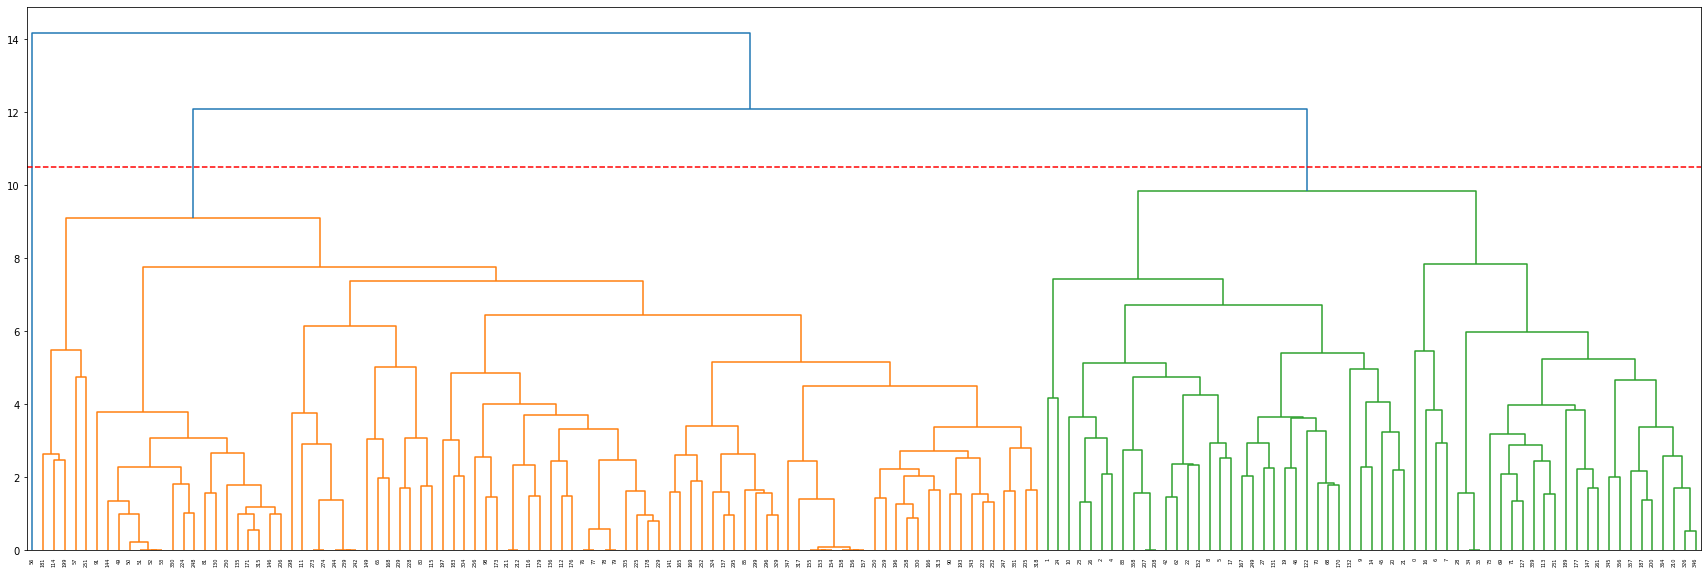

In [55]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df.iloc[:,1:], method = 'complete'),labels=df.index)
plt.axhline(y=10.5, color='r', linestyle='--')

In [56]:
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc2.fit_predict(df.iloc[:,1:])
len(y_hc2)

155

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


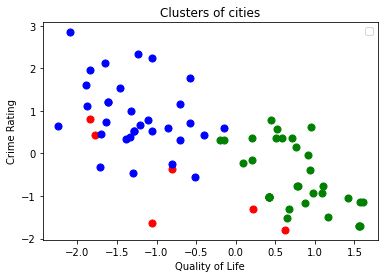

In [59]:
plt.scatter(df['Quality of Life'][y_hc2 == 0], df['Crime Rating'][y_hc2 == 0], s = 50, c = 'red')
plt.scatter(df['Quality of Life'][y_hc2 == 1], df['Crime Rating'][y_hc2 == 1], s = 50, c = 'blue')
plt.scatter(df['Quality of Life'][y_hc2 == 2], df['Crime Rating'][y_hc2 == 2], s = 50, c = 'green')
plt.title('Clusters of cities')
plt.xlabel('Quality of Life')
plt.ylabel('Crime Rating')
plt.legend()
plt.show()